In [1]:
import json
import tweepy
import pandas as pd
import numpy as np
import csv
import requests
import io
from os import path
from PIL import Image

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
consumer_key = 'u3U1bYk207GWk1XERbn4oheVQ'
consumer_secret = '4JdmmcsadeNTWu7H9VO8fhbIG8ijggykOy40Ia2ODw5YGYewhx'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAALI3wwEAAAAAryEHAxu2SVFZnavBzWxQ7SmhkaQ%3D3tIRj6jJvMHQsF5TXunfqMBvBDH7OkxnV9Jc4b5n7PlbW33hER'
access_token = '757508926476722176-fZHEfSdF9dVnpwajujEuVFDT4CWwn5R'
access_token_secret = 'cfo8njKVchkq0mJZviiwQwIM1ecHfSrFq0mbKAp9Ot1XW'

In [6]:
client = tweepy.Client(bearer_token = bearer_token,
                       consumer_key = consumer_key,
                       consumer_secret = consumer_secret,
                       access_token = access_token,
                       access_token_secret = access_token_secret,
                       return_type = requests.Response,
                       wait_on_rate_limit = True)

In [7]:
q1 = 'rivian -is:retweet lang:en'
tweets = client.search_recent_tweets(query = q1, 
                                    tweet_fields = ['author_id', 'text','created_at','public_metrics'],  
                                    max_results = 100)

In [8]:
tweets_dict = tweets.json()
tweets_data = tweets_dict.get('data', []) 
tweets_df = pd.json_normalize(tweets_data)

In [9]:
tweets_df.head()

,author_id,edit_history_tweet_ids,id,created_at,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count
0,348844712,[1854677468164288614],1854677468164288614,2024-11-08T00:09:01.000Z,🛻 @Rivian Q3 2024 Earnings/Stock analysis 📊 $R...,0,0,1,0,0,39
1,1319558110827040768,[1854676434004197697],1854676434004197697,2024-11-08T00:04:54.000Z,NEWS: LG Energy Solution announced that it wil...,2,1,12,1,0,355
2,27061176,[1854676389292552312],1854676389292552312,2024-11-08T00:04:44.000Z,@Hightechcheck2 @superscientific @Rivian Why w...,0,0,0,0,0,4
3,1432184645576232960,[1854676320317247503],1854676320317247503,2024-11-08T00:04:27.000Z,BMX over R3X. This is sick.\n\nThe R3X is at R...,0,1,8,0,0,214
4,129993269,[1854676074531373327],1854676074531373327,2024-11-08T00:03:29.000Z,@RivianUpdates Just gotta get to that R2/3. I...,0,0,0,0,0,11


In [10]:
tweets_df.to_excel(r'rivian tweets.xlsx', index = False)
tweets_df = pd.read_excel('rivian tweets.xlsx', header = 0)

In [11]:
tweets_df

,author_id,edit_history_tweet_ids,id,created_at,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count
0,348844712,['1854677468164288614'],1854677468164288614,2024-11-08T00:09:01.000Z,🛻 @Rivian Q3 2024 Earnings/Stock analysis 📊 $R...,0,0,1,0,0,39
1,1319558110827040768,['1854676434004197697'],1854676434004197697,2024-11-08T00:04:54.000Z,NEWS: LG Energy Solution announced that it wil...,2,1,12,1,0,355
2,27061176,['1854676389292552312'],1854676389292552312,2024-11-08T00:04:44.000Z,@Hightechcheck2 @superscientific @Rivian Why w...,0,0,0,0,0,4
3,1432184645576232960,['1854676320317247503'],1854676320317247503,2024-11-08T00:04:27.000Z,BMX over R3X. This is sick.\n\nThe R3X is at R...,0,1,8,0,0,214
4,129993269,['1854676074531373327'],1854676074531373327,2024-11-08T00:03:29.000Z,@RivianUpdates Just gotta get to that R2/3. I...,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...
95,1168156235297779713,['1854662382200504803'],1854662382200504803,2024-11-07T23:09:04.000Z,@superscientific @Rivian Great spec!,0,0,0,0,0,25
96,21377157,['1854662248863875304'],1854662248863875304,2024-11-07T23:08:32.000Z,@mattmoniz @superscientific @Rivian Wrap that ...,0,1,0,0,0,20
97,21377157,['1854662041140969738'],1854662041140969738,2024-11-07T23:07:43.000Z,@superscientific @Rivian Smart man,0,0,0,0,0,30
98,11999782,['1854661902905098622'],1854661902905098622,2024-11-07T23:07:10.000Z,Rivian (RIVN) Q3 2024 earnings results miss re...,0,0,1,0,0,166


In [12]:
text = ''.join(review for review in tweets_df.text)
print('There are {} words.'.format(len(text)))

There are 14737 words.


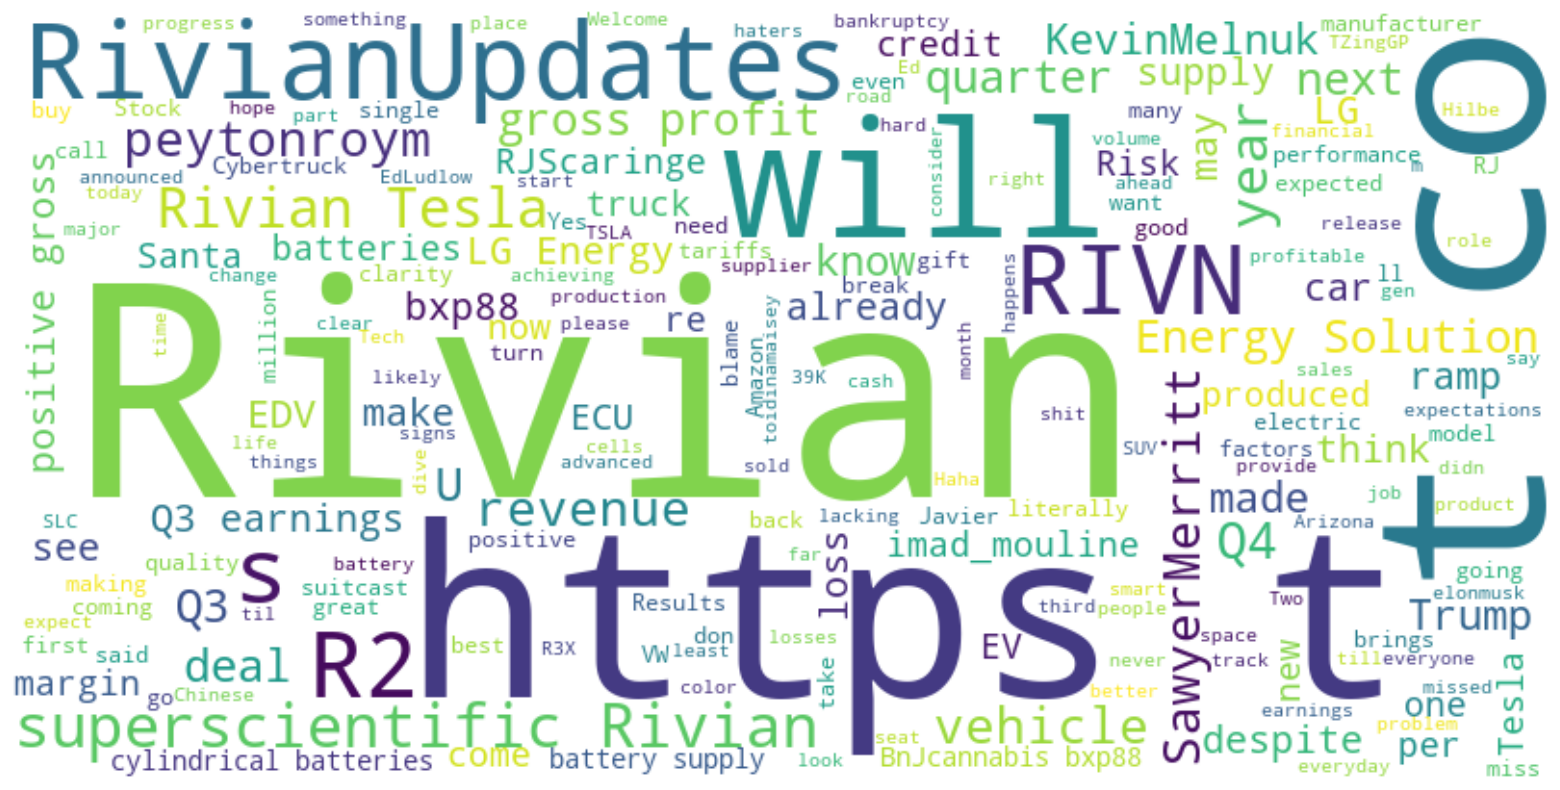

In [13]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "White", width = 800, height = 400).generate(text)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
mask = np.array(Image.open(r'Twitter.png'))

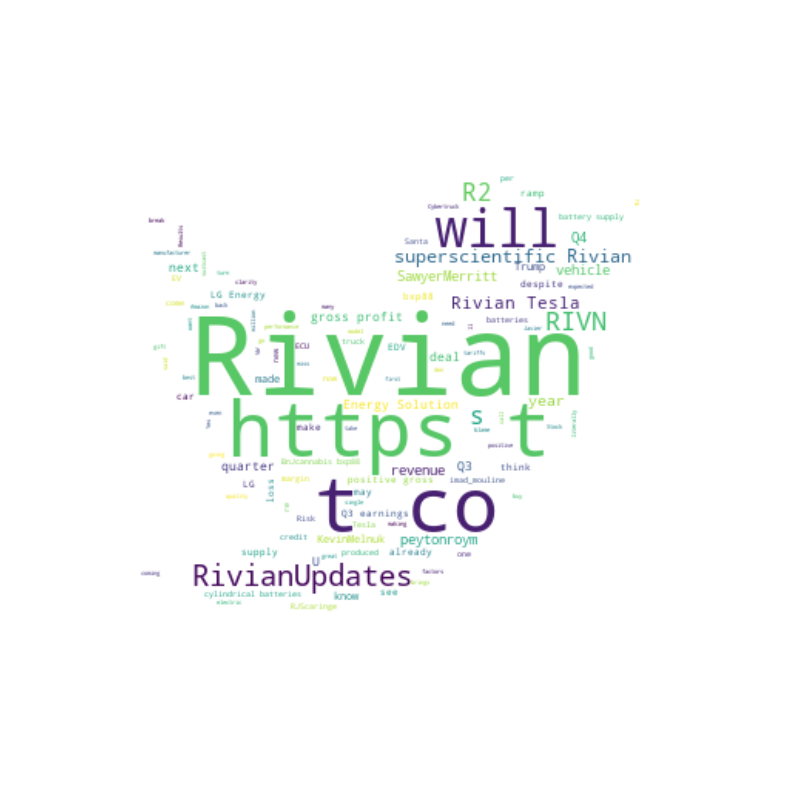

In [15]:
wc = WordCloud(stopwords = STOPWORDS,
               mask = mask,
               background_color = "White",
               max_words = 500,
               max_font_size = 200,
               random_state = 42,
               width = mask.shape[1],
               height = mask.shape[0])

wc.generate(text)
plt.figure(figsize = (20,10))
plt.imshow(wc, interpolation = 'Bilinear')
plt.axis('off')
plt.show()

In [16]:
import nltk
nltk.download('all')

from nltk.tag import pos_tag

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\coach\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\coach\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\coach\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\coach\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\coach\AppData\Roaming\nltk_data...
[

In [17]:
import re, string

def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)  
        token = re.sub("(@[A-Za-z0-9_]+)","", token) 
        
        if len(token) > 0 and token not in string.punctuation: 
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

tweets_df['text'] = remove_noise(tweets_df['text'].tolist())
tweets_df

,author_id,edit_history_tweet_ids,id,created_at,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count
0,348844712,['1854677468164288614'],1854677468164288614,2024-11-08T00:09:01.000Z,🛻 q3 2024 earnings/stock analysis 📊 $rivn,0,0,1,0,0,39
1,1319558110827040768,['1854676434004197697'],1854676434004197697,2024-11-08T00:04:54.000Z,news: lg energy solution announced that it wil...,2,1,12,1,0,355
2,27061176,['1854676389292552312'],1854676389292552312,2024-11-08T00:04:44.000Z,why wait when the adapters work just fine? ...,0,0,0,0,0,4
3,1432184645576232960,['1854676320317247503'],1854676320317247503,2024-11-08T00:04:27.000Z,bmx over r3x. this is sick.\n\nthe r3x is at r...,0,1,8,0,0,214
4,129993269,['1854676074531373327'],1854676074531373327,2024-11-08T00:03:29.000Z,just gotta get to that r2/3. if that happens...,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...
95,1168156235297779713,['1854662382200504803'],1854662382200504803,2024-11-07T23:09:04.000Z,great spec!,0,0,0,0,0,25
96,21377157,['1854662248863875304'],1854662248863875304,2024-11-07T23:08:32.000Z,wrap that gorgeous color? why haha,0,1,0,0,0,20
97,21377157,['1854662041140969738'],1854662041140969738,2024-11-07T23:07:43.000Z,smart man,0,0,0,0,0,30
98,11999782,['1854661902905098622'],1854661902905098622,2024-11-07T23:07:10.000Z,rivian (rivn) q3 2024 earnings results miss re...,0,0,1,0,0,166


In [20]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Converts to lower case and then tokenize
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

tweets_df['text'] = tweets_df['text'].apply(preprocess_text)
tweets_df

,author_id,edit_history_tweet_ids,id,created_at,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count
0,348844712,['1854677468164288614'],1854677468164288614,2024-11-08T00:09:01.000Z,🛻 q3 2024 earnings/stock analysis 📊 $ rivn,0,0,1,0,0,39
1,1319558110827040768,['1854676434004197697'],1854676434004197697,2024-11-08T00:04:54.000Z,news : lg energy solution announced supply riv...,2,1,12,1,0,355
2,27061176,['1854676389292552312'],1854676389292552312,2024-11-08T00:04:44.000Z,wait adapter work fine ? 85 % charging happens...,0,0,0,0,0,4
3,1432184645576232960,['1854676320317247503'],1854676320317247503,2024-11-08T00:04:27.000Z,bmx r3x . sick . r3x rivian ’ austin space tod...,0,1,8,0,0,214
4,129993269,['1854676074531373327'],1854676074531373327,2024-11-08T00:03:29.000Z,got ta get r2/3 . happens think rivian turn co...,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...
95,1168156235297779713,['1854662382200504803'],1854662382200504803,2024-11-07T23:09:04.000Z,great spec !,0,0,0,0,0,25
96,21377157,['1854662248863875304'],1854662248863875304,2024-11-07T23:08:32.000Z,wrap gorgeous color ? haha,0,1,0,0,0,20
97,21377157,['1854662041140969738'],1854662041140969738,2024-11-07T23:07:43.000Z,smart man,0,0,0,0,0,30
98,11999782,['1854661902905098622'],1854661902905098622,2024-11-07T23:07:10.000Z,rivian ( rivn ) q3 2024 earnings result miss r...,0,0,1,0,0,166


In [21]:
analyzer = SentimentIntensityAnalyzer()

def get_polarity(text):
    scores = analyzer.polarity_scores(text)['compound']
    return scores

def get_positive(text):
    scores = analyzer.polarity_scores(text)['pos']
    return scores

def get_neutral(text):
    scores = analyzer.polarity_scores(text)['neu']
    return scores

def get_negative(text):
    scores = analyzer.polarity_scores(text)['neg']
    return scores

tweets_df['polarity'] = tweets_df['text'].apply(get_polarity)
tweets_df['positive'] = tweets_df['text'].apply(get_polarity)
tweets_df['neutral'] = tweets_df['text'].apply(get_polarity)
tweets_df['negative'] = tweets_df['text'].apply(get_polarity)
tweets_df

,author_id,edit_history_tweet_ids,id,created_at,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,polarity,positive,neutral,negative
0,348844712,['1854677468164288614'],1854677468164288614,2024-11-08T00:09:01.000Z,🛻 q3 2024 earnings/stock analysis 📊 $ rivn,0,0,1,0,0,39,0.0000,0.0000,0.0000,0.0000
1,1319558110827040768,['1854676434004197697'],1854676434004197697,2024-11-08T00:04:54.000Z,news : lg energy solution announced supply riv...,2,1,12,1,0,355,0.5267,0.5267,0.5267,0.5267
2,27061176,['1854676389292552312'],1854676389292552312,2024-11-08T00:04:44.000Z,wait adapter work fine ? 85 % charging happens...,0,0,0,0,0,4,0.2023,0.2023,0.2023,0.2023
3,1432184645576232960,['1854676320317247503'],1854676320317247503,2024-11-08T00:04:27.000Z,bmx r3x . sick . r3x rivian ’ austin space tod...,0,1,8,0,0,214,-0.5562,-0.5562,-0.5562,-0.5562
4,129993269,['1854676074531373327'],1854676074531373327,2024-11-08T00:03:29.000Z,got ta get r2/3 . happens think rivian turn co...,0,0,0,0,0,11,-0.2732,-0.2732,-0.2732,-0.2732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1168156235297779713,['1854662382200504803'],1854662382200504803,2024-11-07T23:09:04.000Z,great spec !,0,0,0,0,0,25,0.6588,0.6588,0.6588,0.6588
96,21377157,['1854662248863875304'],1854662248863875304,2024-11-07T23:08:32.000Z,wrap gorgeous color ? haha,0,1,0,0,0,20,0.7906,0.7906,0.7906,0.7906
97,21377157,['1854662041140969738'],1854662041140969738,2024-11-07T23:07:43.000Z,smart man,0,0,0,0,0,30,0.4019,0.4019,0.4019,0.4019
98,11999782,['1854661902905098622'],1854661902905098622,2024-11-07T23:07:10.000Z,rivian ( rivn ) q3 2024 earnings result miss r...,0,0,1,0,0,166,-0.4404,-0.4404,-0.4404,-0.4404


In [23]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['compound'] > 0 else 0
    return sentiment

tweets_df['sentiment'] = tweets_df['text'].apply(get_sentiment)
tweets_df

,author_id,edit_history_tweet_ids,id,created_at,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,polarity,positive,neutral,negative,sentiment
0,348844712,['1854677468164288614'],1854677468164288614,2024-11-08T00:09:01.000Z,🛻 q3 2024 earnings/stock analysis 📊 $ rivn,0,0,1,0,0,39,0.0000,0.0000,0.0000,0.0000,0
1,1319558110827040768,['1854676434004197697'],1854676434004197697,2024-11-08T00:04:54.000Z,news : lg energy solution announced supply riv...,2,1,12,1,0,355,0.5267,0.5267,0.5267,0.5267,1
2,27061176,['1854676389292552312'],1854676389292552312,2024-11-08T00:04:44.000Z,wait adapter work fine ? 85 % charging happens...,0,0,0,0,0,4,0.2023,0.2023,0.2023,0.2023,1
3,1432184645576232960,['1854676320317247503'],1854676320317247503,2024-11-08T00:04:27.000Z,bmx r3x . sick . r3x rivian ’ austin space tod...,0,1,8,0,0,214,-0.5562,-0.5562,-0.5562,-0.5562,0
4,129993269,['1854676074531373327'],1854676074531373327,2024-11-08T00:03:29.000Z,got ta get r2/3 . happens think rivian turn co...,0,0,0,0,0,11,-0.2732,-0.2732,-0.2732,-0.2732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1168156235297779713,['1854662382200504803'],1854662382200504803,2024-11-07T23:09:04.000Z,great spec !,0,0,0,0,0,25,0.6588,0.6588,0.6588,0.6588,1
96,21377157,['1854662248863875304'],1854662248863875304,2024-11-07T23:08:32.000Z,wrap gorgeous color ? haha,0,1,0,0,0,20,0.7906,0.7906,0.7906,0.7906,1
97,21377157,['1854662041140969738'],1854662041140969738,2024-11-07T23:07:43.000Z,smart man,0,0,0,0,0,30,0.4019,0.4019,0.4019,0.4019,1
98,11999782,['1854661902905098622'],1854661902905098622,2024-11-07T23:07:10.000Z,rivian ( rivn ) q3 2024 earnings result miss r...,0,0,1,0,0,166,-0.4404,-0.4404,-0.4404,-0.4404,0


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

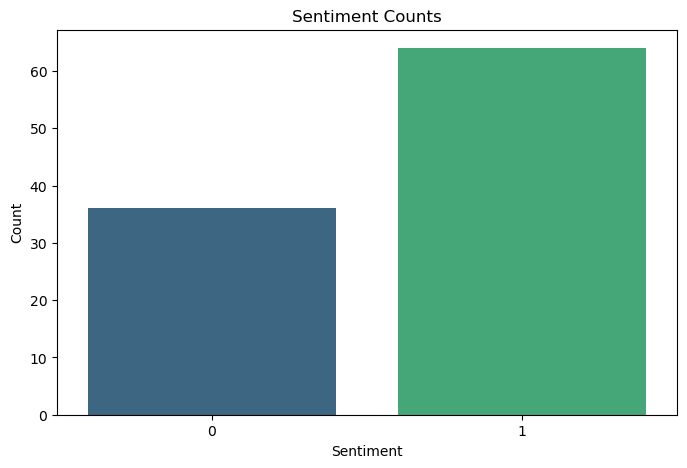

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data = tweets_df, palette="viridis")
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

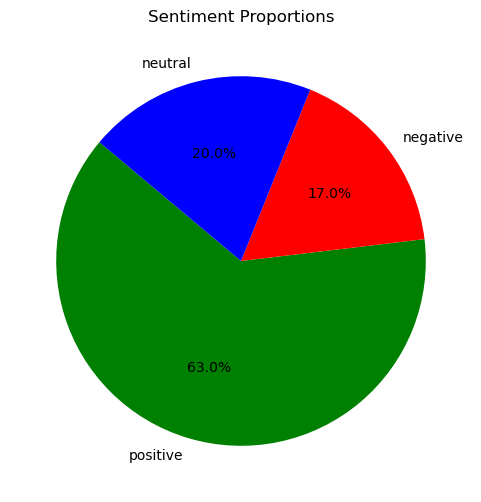

In [31]:
def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

tweets_df['sentiment'] = tweets_df['polarity'].apply(classify_sentiment)

sentiment_order = ["positive", "negative", "neutral"]
sentiment_counts = tweets_df['sentiment'].value_counts().reindex(sentiment_order, fill_value=0)

colors = ['green', 'red', 'blue']

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sentiment Proportions")
plt.show()